C:\Users\Okamura\AppData\Local\Temp\ipykernel_1928\4162561562.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


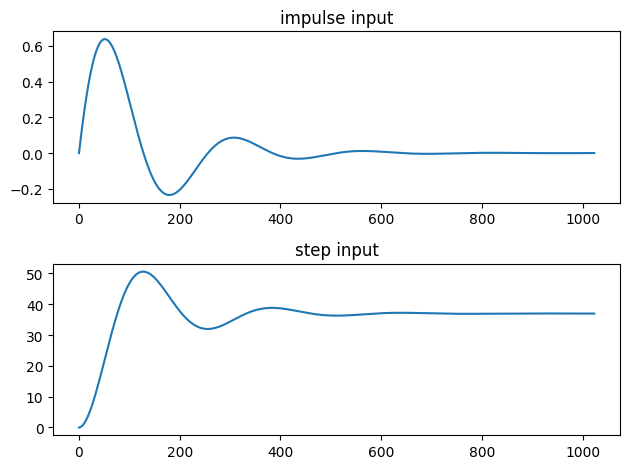

In [3]:
import numpy as np
import matplotlib.pyplot as plt 


def x(n):
    if(n==0): return(1.0)
    else:return(0.0)

def g(n):
    z=np.exp(-n/128.)*np.sin(2*np.pi*n/256.)
    return z

def s(n):
    if(n>=0):return(1.0)
    else:return(0.0)

y=np.zeros(1024)
y2=np.zeros(1024)
for n in range(1024):
    for m in range(n):
        y[n]=y[n]+g(n-m)*x(m)
        y2[n]=y2[n]+g(n-m)*s(m)
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax1.set_title('impulse input')
ax1.plot(y)
ax2=fig.add_subplot(2,1,2)
ax2.set_title('step input')
ax2.plot(y2)
fig.tight_layout()
fig.show()
fig.savefig('impulse.pdf')




In [1]:

t=np.linspace(0,0.2,2000)
y=np.linspace(0,0.2,2000)
w=np.linspace(0,0.2,2000)
U=np.random.rand(2000)-0.5
signal=np.sin(400*np.pi*t)+np.cos(200*np.pi*t)+1+U
m=5
M=11.0
wj=1.0
W=(4*m*m-1)*(2*m+3)/3
for n in range(m,len(t)-m-1,1):
    for j in range(-m,m,1):
        y[n]+=signal[n+j]
        wj=(3*m*(m+1)-1-5*j*j)
        w[n]+=signal[n+j]*wj
    y[n]=y[n]/M
    w[n]=w[n]/W
fig=plt.figure()
ax1=fig.add_subplot(3,1,1)
ax1.set_title('original signal')
ax1.plot(signal)
ax2=fig.add_subplot(3,1,2)
ax2.set_title('moving average signal')
ax2.plot(y)
ax3=fig.add_subplot(3,1,3)
ax3.set_title('polynomial fit signal')
ax3.plot(w)
fig.tight_layout()
fig.show()
fig.savefig('moving_average.pdf')


NameError: name 'np' is not defined

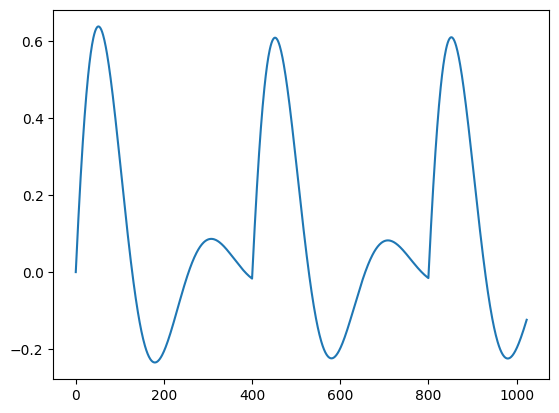

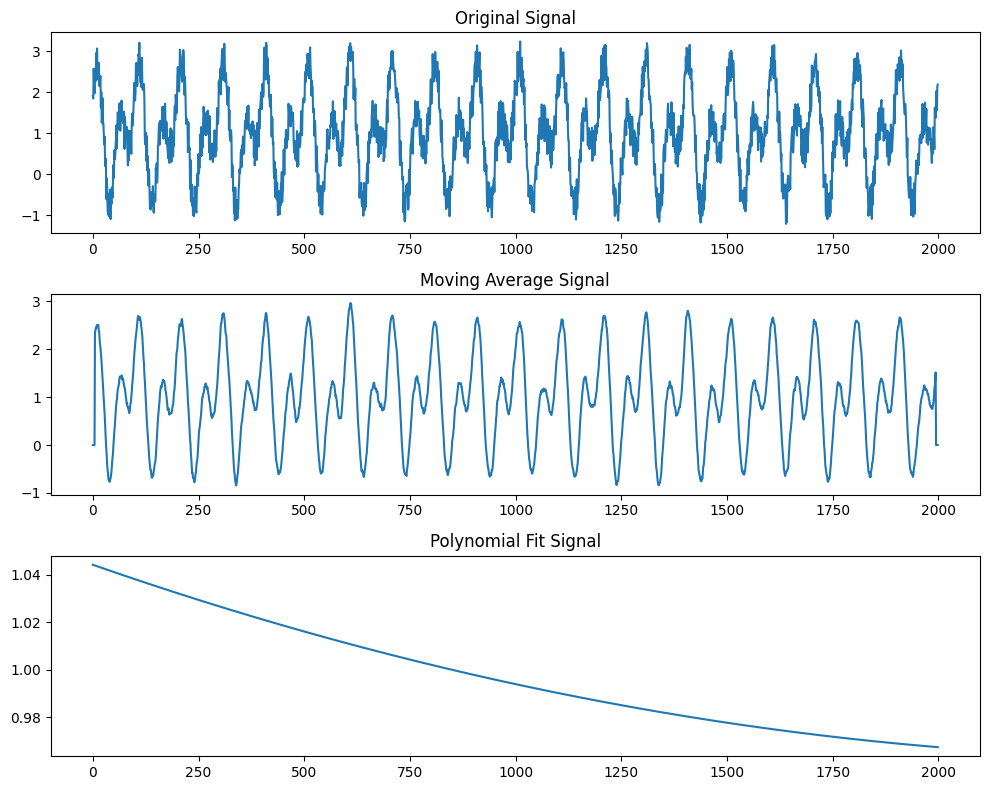

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def x(n):
    return 1.0 if n % 400 == 0 else 0.0

def g(n):
    return np.exp(-n / 128.0) * np.sin(2 * np.pi * n / 256.0)

def compute_convolution():
    y = np.zeros(1024)
    for n in range(1024):
        for m in range(n):
            y[n] += g(n - m) * x(m)
    return y

def moving_average(signal, m):
    y = np.zeros_like(signal)
    M = 2 * m + 1
    for n in range(m, len(signal) - m):
        y[n] = np.sum(signal[n - m:n + m + 1]) / M
    return y

def polynomial_fit(signal, t, degree=2):
    coefficients = np.polyfit(t,signal,degree)
    poly_fit=np.polyval(coefficients,t)
    return poly_fit

def plot_signals(signal, moving_avg, poly_fit):
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    
    axs[0].set_title('Original Signal')
    axs[0].plot(signal)
    
    axs[1].set_title('Moving Average Signal')
    axs[1].plot(moving_avg)
    
    axs[2].set_title('Polynomial Fit Signal')
    axs[2].plot(poly_fit)
    
    fig.tight_layout()
    plt.show()
    fig.savefig('signals.pdf')

# メイン処理
if __name__ == "__main__":
    # インパルス応答の計算とプロット
    y = compute_convolution()
    plt.plot(y)
    plt.savefig('impulse.pdf')
    plt.show()

    # 信号の生成
    t = np.linspace(0, 0.2, 2000)
    U = np.random.rand(2000) - 0.5
    signal = np.sin(400 * np.pi * t) + np.cos(200 * np.pi * t) + 1 + U

    # 移動平均の計算
    m = 5
    moving_avg = moving_average(signal, m)

    # 2次多項式適合の計算
    poly_fit = polynomial_fit(signal, t)

    # 信号のプロット
    plot_signals(signal, moving_avg, poly_fit)

0.21366666666666667 0.0009199999999999997


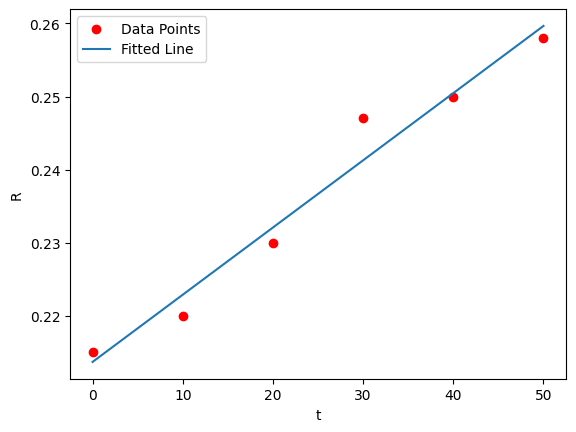

In [6]:
R=np.array([0.215,0.220,0.230,0.247,0.250,0.258])
rho1=rho2=x=y=0.0

for t in range(0,60,10):
    rho1+=R[t//10]*t
    rho2+=t*t
    x+=t
    y+=R[t//10]
a0=(y*rho2-x*rho1)/(6*rho2-x*x)
a1=(6*rho1-x*y)/(6*rho2-x*x)
print(a0,a1)

# データ点の散布図を表示
t_values = np.arange(0, 60, 10)
plt.scatter(t_values, R, color='red', label='Data Points')

# 直線を表示
plt.plot([0, 50], [a0, a0 + a1 * 50], label='Fitted Line')

plt.xlabel('t')
plt.ylabel('R')
plt.legend()
plt.show()

-0.0 0.8436849575613676


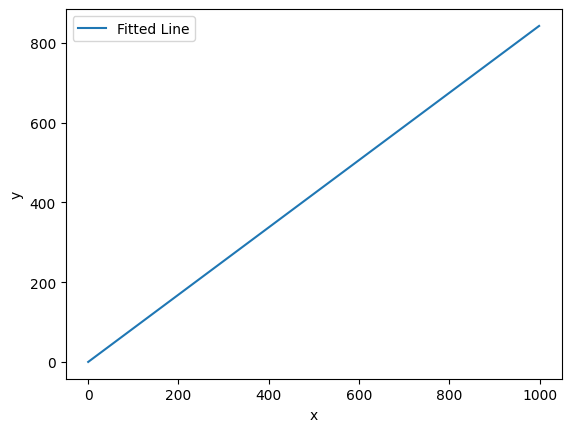

In [29]:
G=np.array([1.0,-0.9,0.8,-0.7,0.6])
rng = np.random.default_rng()
x=rng.standard_normal(1000)
y=np.zeros(1000)
sigma=rng.standard_normal(1000) / 20

for n in range(0,len(x)):
    for m in range(0,len(G)):
        if(n-m<0):y[n]+=0
        else:y[n]+=x[n-m]*G[m]
    y[n]+=sigma[n]

rhoa = rhob = xbar = ybar = 0.0
for n in range(0,len(x)):
    rho1+=y[n]*x[n]
    rho2+=x[n]*x[n]
    xbar+=x[n]
    ybar+=y[n]
rhoa=rhoa/len(x)
rhob/=len(x)
xbar/=len(x)
ybar/=len(x)
b0=(ybar*rhob-xbar*rhoa)/(rhob-xbar*xbar)
b1=(rhoa-xbar*ybar)/(rhob-xbar*xbar)
print(b0,b1)
t=np.arange(0,1000)
line=b0+b1*t
# 直線を表示
plt.plot(t,line,label='Fitted Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


[[-1.42806802 -0.30414831 -0.37065538  1.97928745  1.11806119]
 [ 0.23443477 -1.42806802 -0.30414831 -0.37065538  1.97928745]
 [-1.71476108  0.23443477 -1.42806802 -0.30414831 -0.37065538]
 ...
 [ 0.49578913 -0.05534569 -0.19752826 -0.01100786 -0.12043586]
 [ 1.24806994  0.49578913 -0.05534569 -0.19752826 -0.01100786]
 [ 1.4762777   1.24806994  0.49578913 -0.05534569 -0.19752826]]
[ 0.99964261 -0.90062812  0.80239853 -0.69683832  0.59957406]


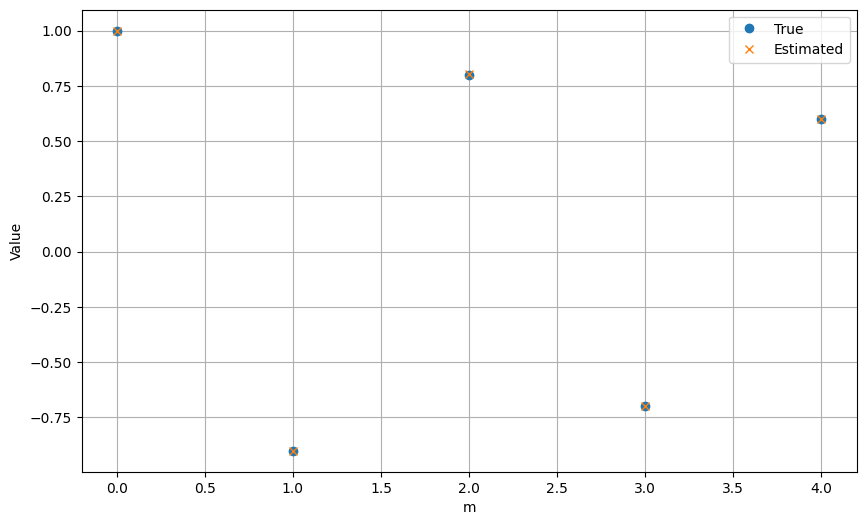

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
g_true = np.array([1, -0.9, 0.8, -0.7, 0.6])
x = np.random.normal(0, 1, 1000)
epsilon = np.random.normal(0, 1/20, 1000)

y = np.zeros_like(x)
for n in range(N, len(x)):
    y[n] = np.dot(g_true, x[n-N:n][::-1]) + epsilon[n]

X = np.zeros((len(x) - N, N))
for n in range(N, len(x)):
    X[n-N] = x[n-N:n][::-1]
print(X)
y_trimmed = y[N:]

g_estimated = np.linalg.lstsq(X, y_trimmed, rcond=None)[0]

print( g_estimated)

plt.figure(figsize=(10, 6))
plt.plot(g_true, 'o', label='True')
plt.plot(g_estimated, 'x', label='Estimated')
plt.xlabel('m')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()